# 8Day data from the OceanColor repository
# no resampling is done here

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import seaborn as sns
from matplotlib.colors import LogNorm

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# load oceancolor dataset

In [3]:
ds_8day = xr.open_mfdataset('./data_collector_modisa_chla9km/ModisA_Arabian_Sea_chlor_a_9km_*_8D.nc')
ds_daily = xr.open_mfdataset('./data_collector_modisa_chla9km/ModisA_Arabian_Sea_chlor_a_9km_*_D.nc')
both_datasets = [ds_8day, ds_daily]

In [4]:
# how much data is contained here? let's get the answer in MB
print([(ds.nbytes / 1e6) for ds in both_datasets])

[534.295504, 4241.4716]


In [5]:
# load all the data in the memory
[ds.load() for ds in both_datasets]

[<xarray.Dataset>
 Dimensions:        (eightbitcolor: 256, lat: 276, lon: 360, rgb: 3, time: 667)
 Coordinates:
   * lat            (lat) float64 27.96 27.87 27.79 27.71 27.62 27.54 27.46 ...
   * lon            (lon) float64 45.04 45.13 45.21 45.29 45.38 45.46 45.54 ...
   * rgb            (rgb) int64 0 1 2
   * eightbitcolor  (eightbitcolor) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
   * time           (time) datetime64[ns] 2002-07-04 2002-07-12 2002-07-20 ...
 Data variables:
     palette        (time, rgb, eightbitcolor) float64 -109.0 0.0 108.0 ...
     chlor_a        (time, lat, lon) float64 nan nan nan nan nan nan nan nan ...,
 <xarray.Dataset>
 Dimensions:        (eightbitcolor: 256, lat: 276, lon: 360, rgb: 3, time: 5295)
 Coordinates:
   * lat            (lat) float64 27.96 27.87 27.79 27.71 27.62 27.54 27.46 ...
   * lon            (lon) float64 45.04 45.13 45.21 45.29 45.38 45.46 45.54 ...
   * rgb            (rgb) int64 0 1 2
   * eightbitcolor  (eightbitcolor) int64 0 

In [16]:
# fix bad data
def fix_bad_data(ds):
    # for some reason, the cloud / land mask is backwards on some data
    # this is obvious because there are chlorophyl values less than zero
    bad_data = ds.chlor_a.groupby('time').min() < 0
    # loop through and fix
    for n in np.nonzero(bad_data.values)[0]:
        data = ds.chlor_a[n].values 
        ds.chlor_a.values[n] = np.ma.masked_less(data, 0).filled(np.nan)

In [17]:
[fix_bad_data(ds) for ds in both_datasets]

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/xarray/core/variable.py:1046: RuntimeWarning: invalid value encountered in less
  if not reflexive


[None, None]

In [19]:
ds_8day.chlor_a>0  # mask

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/xarray/core/variable.py:1046: RuntimeWarning: invalid value encountered in greater
  if not reflexive


<xarray.DataArray 'chlor_a' (time: 667, lat: 276, lon: 360)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., Fal

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/xarray/core/variable.py:1046: RuntimeWarning: invalid value encountered in greater
  if not reflexive


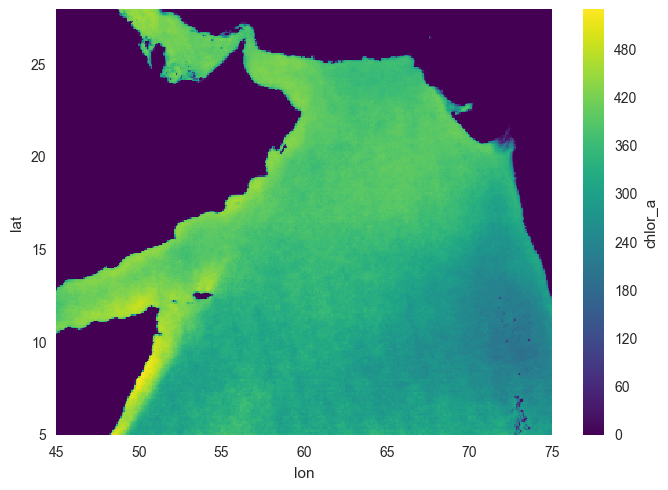

In [20]:
# count the number of ocean data points
(ds_8day.chlor_a>0).sum(dim='time').plot()

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/xarray/core/variable.py:1046: RuntimeWarning: invalid value encountered in greater
  if not reflexive


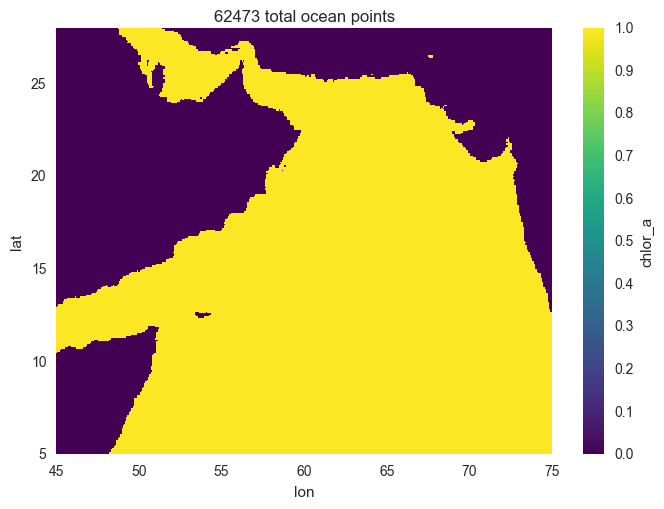

In [21]:
#  find a mask for the land
ocean_mask = (ds_8day.chlor_a>0).sum(dim='time')>0
#ocean_mask = (ds_daily.chl_ocx>0).sum(dim='time')>0
num_ocean_points = ocean_mask.sum().values  # compute the total nonzeros regions(data point)
ocean_mask.plot()
plt.title('%g total ocean points' % num_ocean_points)

In [22]:
#ds_8day

In [23]:
#ds_daily

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


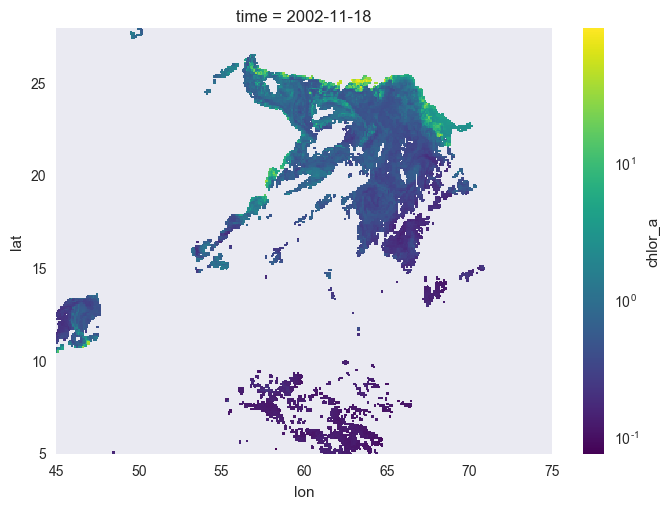

In [24]:
ds_daily.chlor_a.sel(time='2002-11-18',method='nearest').plot(norm=LogNorm())
#ds_daily.chlor_a.sel(time=target_date, method='nearest').plot(norm=LogNorm())

In [25]:
#list(ds_daily.groupby('time')) # take a look at what's inside

In [26]:
'''
<xarray.Dataset>
Dimensions:        (eightbitcolor: 256, lat: 144, lon: 276, rgb: 3, time: 4748)
'''
ds_daily.groupby('time').count() # information from original data

<xarray.Dataset>
Dimensions:  (time: 5295)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-04 2002-07-05 2002-07-06 ...
Data variables:
    palette  (time) int64 768 768 768 768 768 768 768 768 768 768 768 768 ...
    chlor_a  (time) int64 658 1170 1532 2798 2632 1100 1321 636 2711 1163 ...

In [27]:
ds_daily.chlor_a.groupby('time').count()/float(num_ocean_points)

<xarray.DataArray 'chlor_a' (time: 5295)>
array([ 0.01053255,  0.01872809,  0.02452259, ...,  0.        ,
        0.        ,  0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2002-07-04 2002-07-05 2002-07-06 ...

In [28]:
count_8day,count_daily = [ds.chlor_a.groupby('time').count()/float(num_ocean_points)
                            for ds in (ds_8day, ds_daily)]

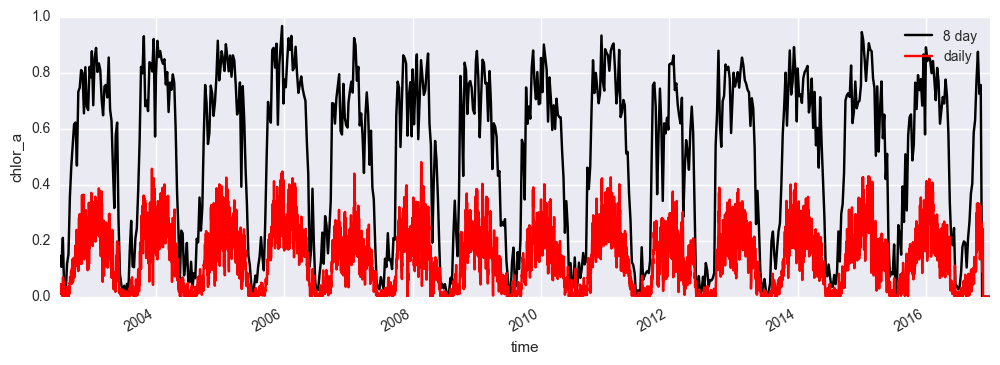

In [29]:
plt.figure(figsize=(12,4))
count_8day.plot(color='k')
count_daily.plot(color='r')

plt.legend(['8 day','daily'])

In [30]:
# Seasonal Climatology
count_8day_clim, coundt_daily_clim = [count.groupby('time.month').mean()  # monthly data
                                      for count in (count_8day, count_daily)]

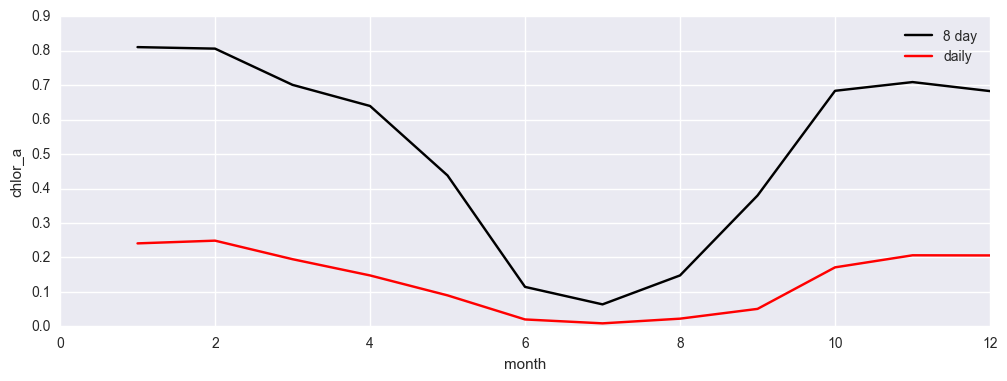

In [31]:
# mean value of the monthly data on the count of nonzeros
plt.figure(figsize=(12,4))
count_8day_clim.plot(color='k')
coundt_daily_clim.plot(color='r')
plt.legend(['8 day', 'daily'])

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


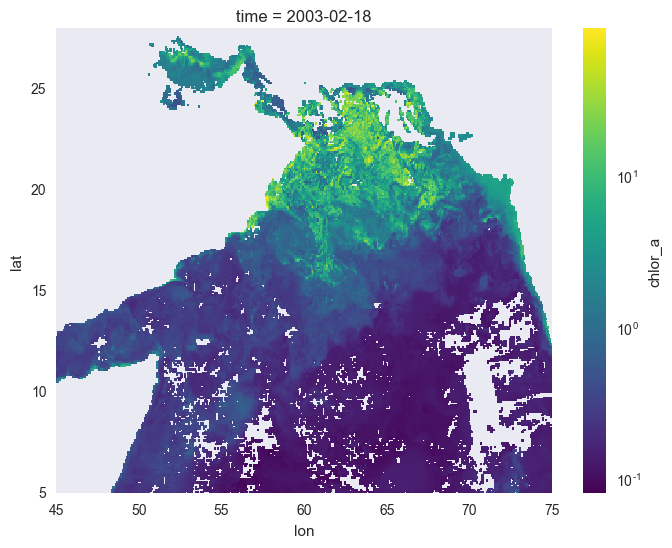

In [32]:
# Maps of individual days
target_date = '2003-02-15'
plt.figure(figsize=(8,6))
ds_8day.chlor_a.sel(time=target_date, method='nearest').plot(norm=LogNorm())

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


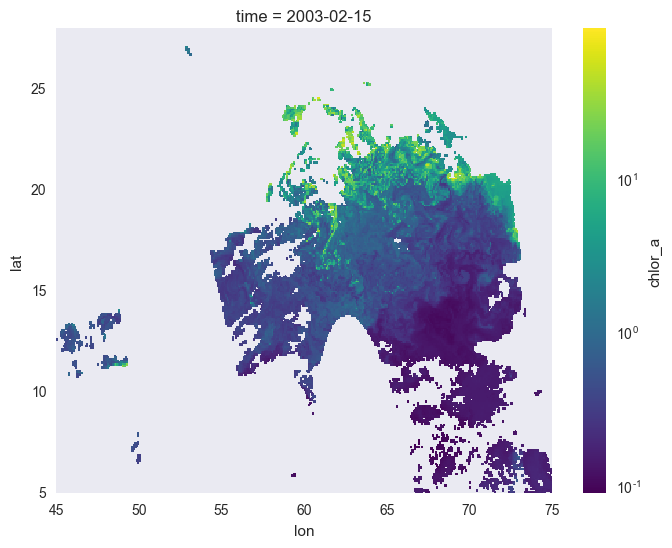

In [33]:
plt.figure(figsize=(8,6))
ds_daily.chlor_a.sel(time=target_date, method='nearest').plot(norm=LogNorm())

In [34]:
ds_daily.chlor_a[0].sel_points(lon=[65, 70], lat=[16, 18], method='nearest')   # the time is selected!
#ds_daily.chlor_a[0].sel_points(time= times, lon=lons, lat=times, method='nearest')

<xarray.DataArray 'chlor_a' (points: 2)>
array([ nan,  nan])
Coordinates:
    time     datetime64[ns] 2002-07-04
    lat      (points) float64 16.04 18.04
    lon      (points) float64 65.04 70.04
  * points   (points) int64 0 1

In [35]:
#ds_daily.chlor_a.sel_points?

In [36]:
#ds_9day = ds_daily.resample('9D', dim='time')
ds_8day    # just use what we have... this is from OceanColor website

<xarray.Dataset>
Dimensions:        (eightbitcolor: 256, lat: 276, lon: 360, rgb: 3, time: 667)
Coordinates:
  * lat            (lat) float64 27.96 27.87 27.79 27.71 27.62 27.54 27.46 ...
  * lon            (lon) float64 45.04 45.13 45.21 45.29 45.38 45.46 45.54 ...
  * rgb            (rgb) int64 0 1 2
  * eightbitcolor  (eightbitcolor) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * time           (time) datetime64[ns] 2002-07-04 2002-07-12 2002-07-20 ...
Data variables:
    palette        (time, rgb, eightbitcolor) float64 -109.0 0.0 108.0 ...
    chlor_a        (time, lat, lon) float64 nan nan nan nan nan nan nan nan ...

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


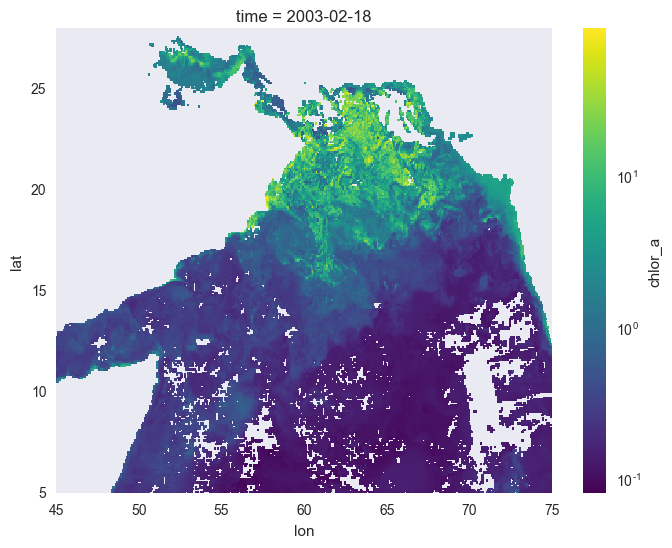

In [38]:
plt.figure(figsize=(8,6))
ds_8day.chlor_a.sel(time=target_date, method='nearest').plot(norm=LogNorm())

In [39]:
# check the range for the longitude
print(ds_8day.lon.min(),'\n' ,ds_8day.lat.min())  

<xarray.DataArray 'lon' ()>
array(45.04166793823242) 
 <xarray.DataArray 'lat' ()>
array(5.041661739349365)


# ++++++++++++++++++++++++++++++++++++++++++++++
# All GDP Floats
# Load the float data
# Map a (time, lon, lat) to a value on the cholorphlly value

In [40]:
# in the following we deal with the data from the gdp float
from buyodata  import buoydata
import os

In [41]:
# a list of files
fnamesAll = ['./gdp_float/buoydata_1_5000.dat','./gdp_float/buoydata_5001_10000.dat','./gdp_float/buoydata_10001_15000.dat','./gdp_float/buoydata_15001_jun16.dat']

In [42]:
# read them and cancatenate them into one DataFrame
dfAll = pd.concat([buoydata.read_buoy_data(f) for f in fnamesAll])  # around 4~5 minutes

#mask = df.time>='2002-07-04' # we only have data after this data for chlor_a
dfvvAll = dfAll[dfAll.time>='2002-07-04']

sum(dfvvAll.time<'2002-07-04') # recheck whether the time is 

0

In [43]:
# process the data so that the longitude are all >0
print('before processing, the minimum longitude is%f4.3 and maximum is %f4.3' % (dfvvAll.lon.min(), dfvvAll.lon.max()))
mask = dfvvAll.lon<0
dfvvAll.lon[mask] = dfvvAll.loc[mask].lon + 360
print('after processing, the minimum longitude is %f4.3 and maximum is %f4.3' % (dfvvAll.lon.min(),dfvvAll.lon.max()) )

dfvvAll.describe()

before processing, the minimum longitude is0.0000004.3 and maximum is 360.0000004.3


/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/pandas/core/generic.py:4695: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

after processing, the minimum longitude is 0.0000004.3 and maximum is 360.0000004.3


,id,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp
count,2.147732e+07,2.131997e+07,2.131997e+07,1.986179e+07,2.129142e+07,2.129142e+07,2.129142e+07,2.147732e+07,2.147732e+07,2.147732e+07
mean,1.765662e+06,-2.263128e+00,2.124412e+02,1.986121e+01,2.454172e-01,4.708192e-01,2.613427e+01,7.326258e+00,7.326555e+00,7.522298e+01
std,9.452835e+06,3.401115e+01,9.746941e+01,8.339498e+00,2.525050e+01,2.052160e+01,1.939087e+01,8.527853e+01,8.527851e+01,2.637454e+02
min,2.578000e+03,-7.764700e+01,0.000000e+00,-1.685000e+01,-2.916220e+02,-2.601400e+02,0.000000e+00,5.268300e-07,-3.941600e-02,1.001300e-03
25%,4.897500e+04,-3.186000e+01,1.490720e+02,1.437300e+01,-1.411400e+01,-1.044700e+01,1.290300e+01,4.366500e-06,7.512600e-06,1.435700e-03
50%,7.141300e+04,-4.920000e+00,2.153940e+02,2.214400e+01,-5.560000e-01,1.970000e-01,2.176700e+01,8.833600e-06,1.495800e-05,1.691700e-03
75%,1.094330e+05,2.756000e+01,3.064370e+02,2.688900e+01,1.356100e+01,1.109300e+01,3.405900e+01,1.833300e-05,3.627900e-05,2.294200e-03
max,6.399288e+07,8.989900e+01,3.600000e+02,4.595000e+01,4.417070e+02,2.783220e+02,4.421750e+02,1.000000e+03,1.000000e+03,1.000000e+03


dfvvAll.shape is (21477317, 11), floatsAll.shape is (111894, 11)


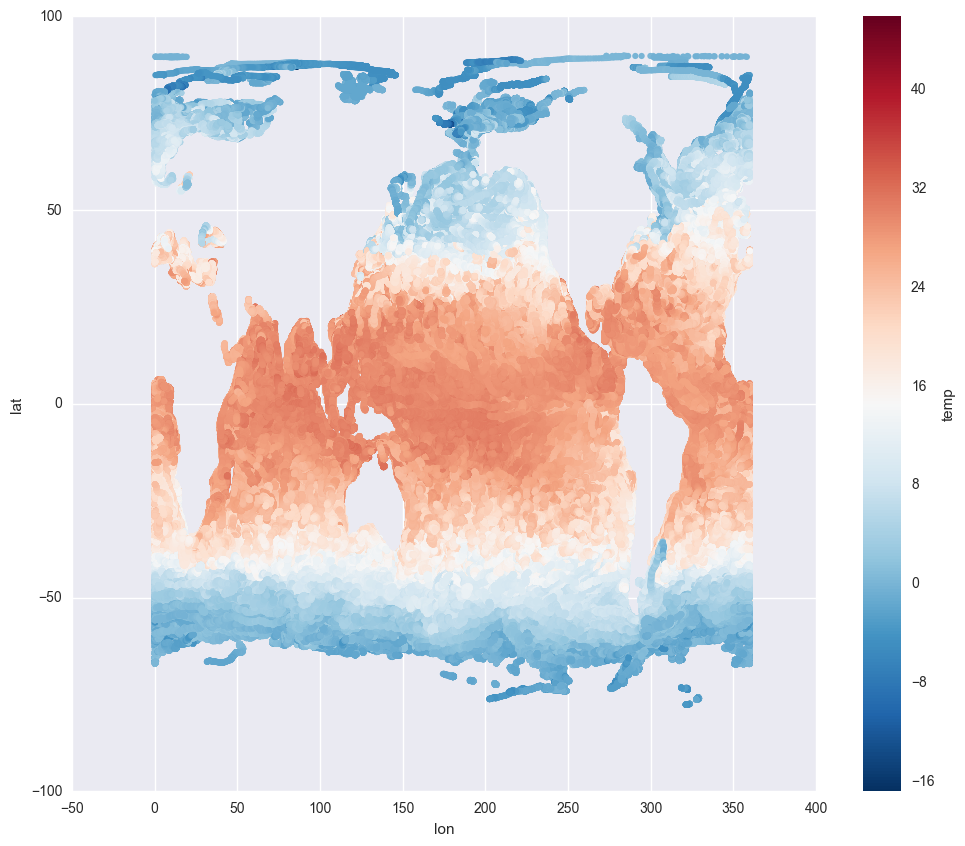

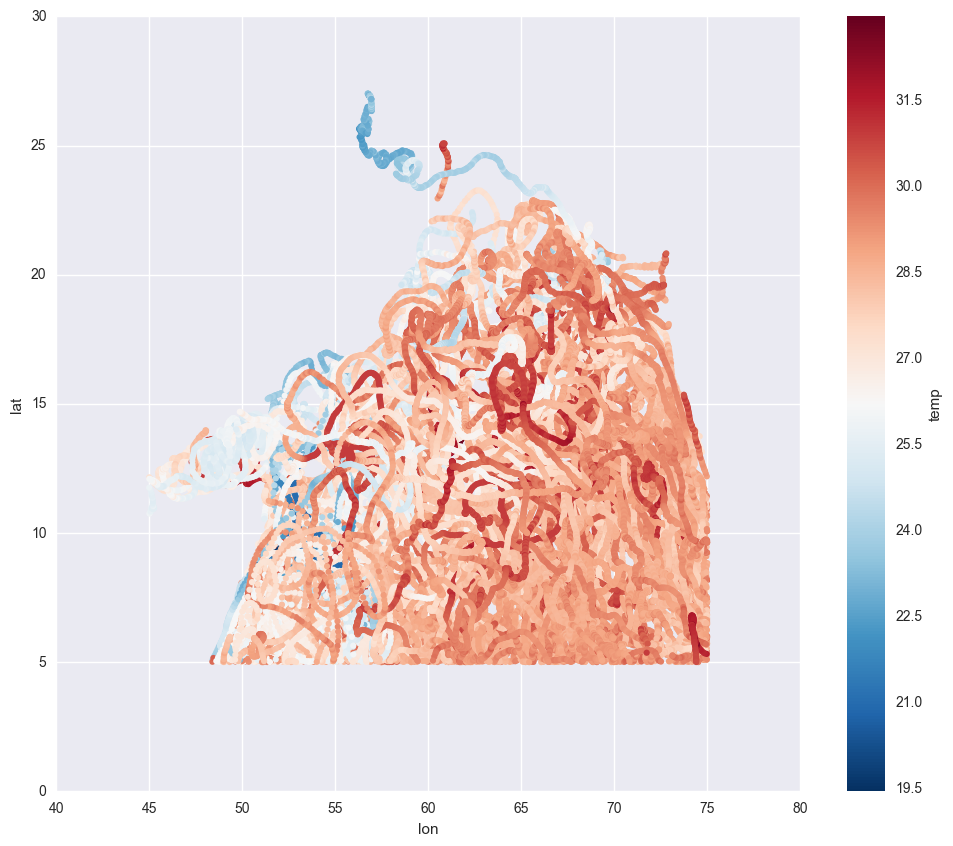

In [44]:
# Select only the arabian sea region
arabian_sea = (dfvvAll.lon > 45) & (dfvvAll.lon< 75) & (dfvvAll.lat> 5) & (dfvvAll.lat <28)
# arabian_sea = {'lon': slice(45,75), 'lat': slice(5,28)} # later use this longitude and latitude
floatsAll = dfvvAll.loc[arabian_sea]   # directly use mask
print('dfvvAll.shape is %s, floatsAll.shape is %s' % (dfvvAll.shape, floatsAll.shape) )

# visualize the float around global region
fig, ax  = plt.subplots(figsize=(12,10))
dfvvAll.plot(kind='scatter', x='lon', y='lat', c='temp', cmap='RdBu_r', edgecolor='none', ax=ax)

# visualize the float around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
floatsAll.plot(kind='scatter', x='lon', y='lat', c='temp', cmap='RdBu_r', edgecolor='none', ax=ax)

In [45]:
# dump the surface floater data from pandas.dataframe to xarray.dataset
floatsDSAll = xr.Dataset.from_dataframe(floatsAll.set_index(['time','id']) ) # set time & id as the index); use reset_index to revert this operation
floatsDSAll

<xarray.Dataset>
Dimensions:  (id: 259, time: 17499)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-04 2002-07-04T06:00:00 ...
  * id       (id) int64 7574 10206 10208 11089 15703 15707 27069 27139 28842 ...
Data variables:
    lat      (time, id) float64 nan 16.3 14.03 16.4 14.04 nan 20.11 nan ...
    lon      (time, id) float64 nan 66.23 69.48 64.58 69.51 nan 68.55 nan ...
    temp     (time, id) float64 nan nan nan 28.0 28.53 nan 28.93 nan 27.81 ...
    ve       (time, id) float64 nan 8.68 5.978 6.286 4.844 nan 32.9 nan ...
    vn       (time, id) float64 nan -13.18 -18.05 -7.791 -17.47 nan 15.81 ...
    spd      (time, id) float64 nan 15.78 19.02 10.01 18.13 nan 36.51 nan ...
    var_lat  (time, id) float64 nan 0.0002661 5.01e-05 5.018e-05 5.024e-05 ...
    var_lon  (time, id) float64 nan 0.0006854 8.851e-05 9.018e-05 8.968e-05 ...
    var_tmp  (time, id) float64 nan 1e+03 1e+03 0.003733 0.0667 nan 0.001683 ...

In [46]:
# resample on the xarray.dataset onto two-day frequency
floatsDSAll_8D =floatsDSAll.resample('8D', dim='time')
floatsDSAll_8D

<xarray.Dataset>
Dimensions:  (id: 259, time: 639)
Coordinates:
  * id       (id) int64 7574 10206 10208 11089 15703 15707 27069 27139 28842 ...
  * time     (time) datetime64[ns] 2002-07-04 2002-07-12 2002-07-20 ...
Data variables:
    spd      (time, id) float64 nan 8.832 18.7 19.48 17.6 nan 25.74 nan ...
    vn       (time, id) float64 nan -0.2949 -9.82 -12.91 -8.593 nan -1.964 ...
    var_lon  (time, id) float64 nan 0.005415 0.0001179 0.0001259 9.874e-05 ...
    lon      (time, id) float64 nan 66.51 69.86 64.99 69.87 nan 69.35 nan ...
    lat      (time, id) float64 nan 16.21 13.62 16.14 13.65 nan 20.09 nan ...
    var_lat  (time, id) float64 nan 0.001424 6.2e-05 6.574e-05 5.391e-05 nan ...
    ve       (time, id) float64 nan 7.335 13.25 12.26 12.13 nan 24.29 nan ...
    var_tmp  (time, id) float64 nan 1e+03 1e+03 0.00364 0.08777 nan 0.001711 ...
    temp     (time, id) float64 nan nan nan 27.81 28.57 nan 28.99 nan 27.65 ...

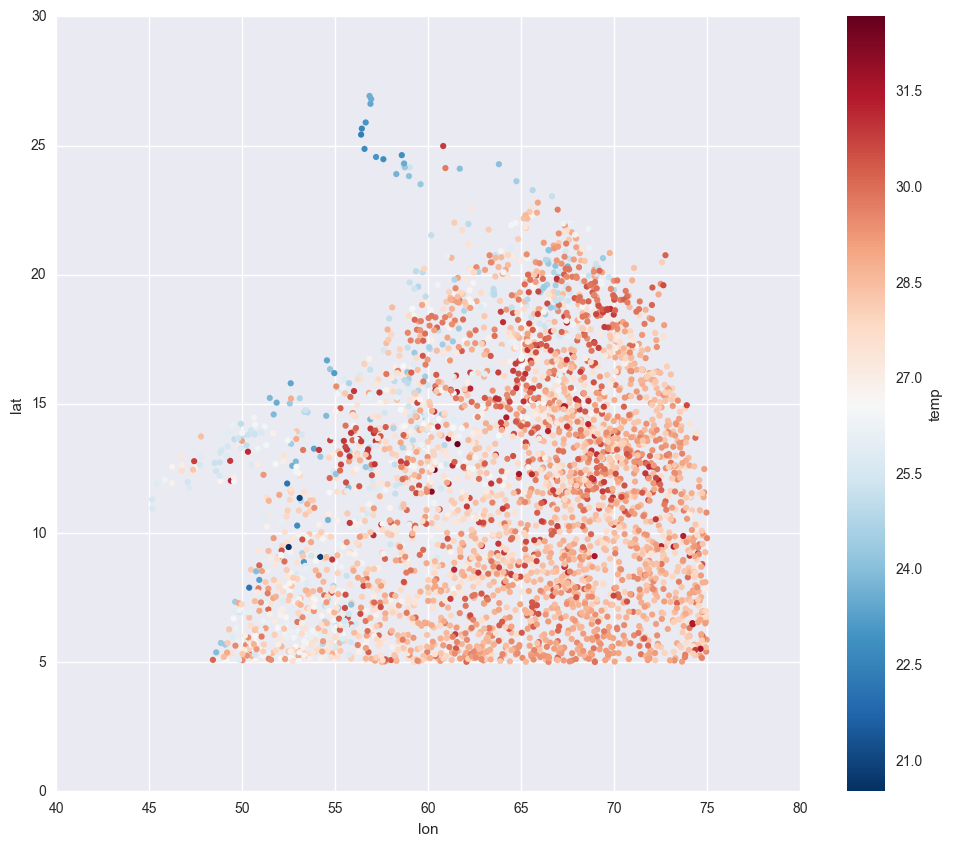

In [47]:
# transfer it back to pandas.dataframe for plotting
floatsDFAll_8D = floatsDSAll_8D.to_dataframe()
floatsDFAll_8D
floatsDFAll_8D = floatsDFAll_8D.reset_index()
floatsDFAll_8D
# visualize the 2D-floats around arabian region
fig, ax  = plt.subplots(figsize=(12,10))
floatsDFAll_8D.plot(kind='scatter', x='lon', y='lat', c='temp', cmap='RdBu_r', edgecolor='none', ax=ax)

In [48]:
# get the value for the chllorophy for each data entry
floatsDFAll_8Dtimeorder = floatsDFAll_8D.sort_values(['time','id'],ascending=True)
floatsDFAll_8Dtimeorder # check whether it is time ordered!!
# should we drop nan to speed up??

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp
0,7574,2002-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,10206,2002-07-04,8.832125,-0.294906,0.005415,66.510656,16.208687,0.001424,7.334875,1000.000000,NaN
1278,10208,2002-07-04,18.702906,-9.820156,0.000118,69.858594,13.617187,0.000062,13.248719,1000.000000,NaN
1917,11089,2002-07-04,19.484250,-12.911969,0.000126,64.993937,16.140125,0.000066,12.260094,0.003640,27.807781
2556,15703,2002-07-04,17.604156,-8.592531,0.000099,69.867031,13.648188,0.000054,12.131219,0.087771,28.569812
3195,15707,2002-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3834,27069,2002-07-04,25.743625,-1.963906,0.000099,69.350187,20.090281,0.000054,24.285875,0.001711,28.985781
4473,27139,2002-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5112,28842,2002-07-04,17.876969,-7.667469,0.000218,60.820937,18.663125,0.000103,3.765094,0.003330,27.649500
5751,34159,2002-07-04,35.638313,14.802688,0.000116,59.602656,12.808719,0.000061,31.401250,1000.000000,NaN


In [49]:
floatsDFAll_8Dtimeorder.lon.dropna().shape  # the longitude data has lots of values (3855,)

(3855,)

In [50]:
mask = floatsDFAll_8Dtimeorder.lon.isnull() | floatsDFAll_8Dtimeorder.lat.isnull() | floatsDFAll_8Dtimeorder.time.isnull()
mask
floatsDFAll_8Dtimeorder[~mask].shape # the {long, lat, time} data has lots of values (3855,)

(3855, 11)

In [51]:
tmpAll = ds_8day.chlor_a.sel_points(time=list(floatsDFAll_8Dtimeorder.time),lon=list(floatsDFAll_8Dtimeorder.lon), lat=list(floatsDFAll_8Dtimeorder.lat), method='nearest')
print('the count of nan vaues in tmpAll is',tmpAll.to_series().isnull().sum())

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/pandas/indexes/base.py:2352: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/pandas/indexes/base.py:2352: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


the count of nan vaues in tmpAll is 163760


In [52]:
#print(tmpAll.dropna().shape)
tmpAll.to_series().dropna().shape  # (1741,) good values

(1741,)

after editing the dataframe the nan values in 'chlor_a' is 163760


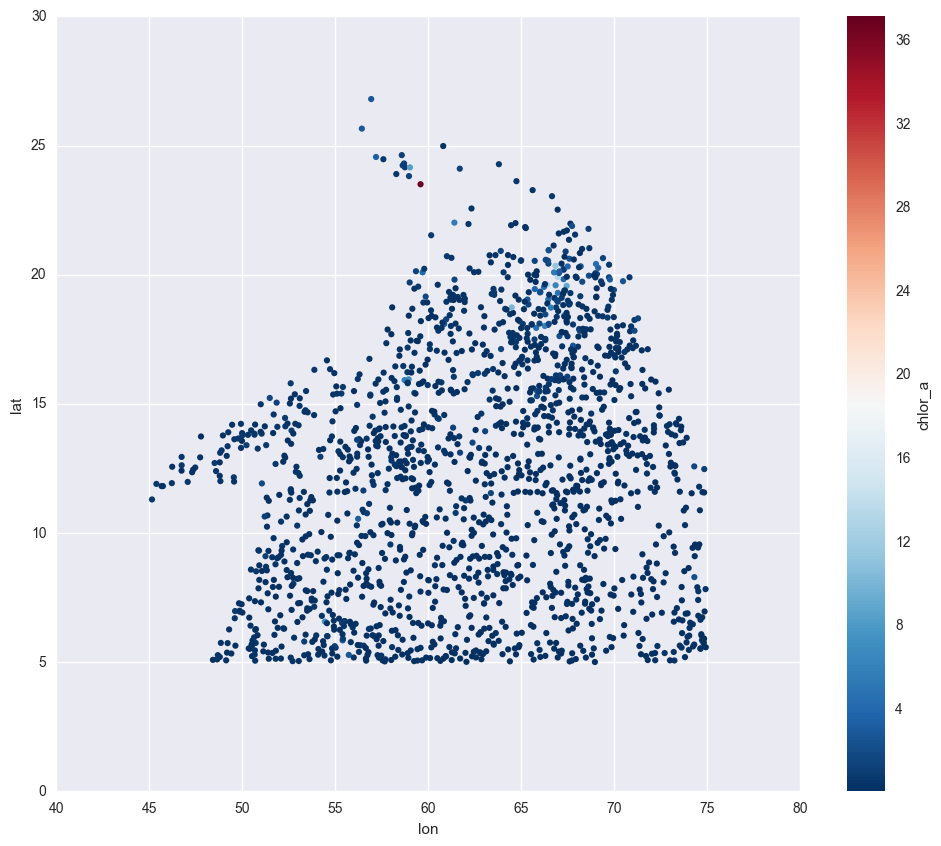

In [53]:
# tmp.to_series() to transfer it from xarray dataset to series
floatsDFAll_8Dtimeorder['chlor_a'] = pd.Series(np.array(tmpAll.to_series()), index=floatsDFAll_8Dtimeorder.index)
print("after editing the dataframe the nan values in 'chlor_a' is",floatsDFAll_8Dtimeorder.chlor_a.isnull().sum() )  # they should be the same values as above

# take a look at the data
floatsDFAll_8Dtimeorder

# visualize the float around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
floatsDFAll_8Dtimeorder.plot(kind='scatter', x='lon', y='lat', c='chlor_a', cmap='RdBu_r', edgecolor='none', ax=ax)

In [54]:
def scale(x):
    logged = np.log10(x)
    return logged

(1741,)

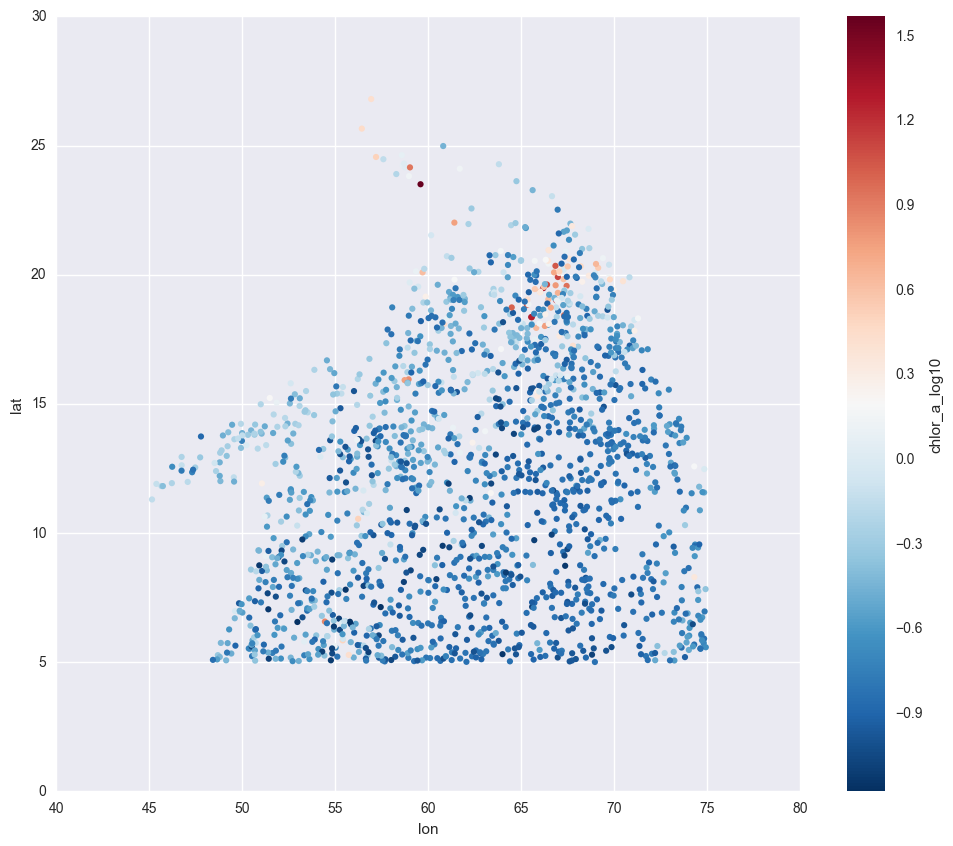

In [59]:
#print(floatsAll_timeorder['chlor_a'].apply(scale))
floatsDFAll_8Dtimeorder['chlor_a_log10'] = floatsDFAll_8Dtimeorder['chlor_a'].apply(scale)
floatsDFAll_8Dtimeorder
#print("after the transformation the nan values in 'chlor_a_log10' is", floatsAll_timeorder.chlor_a_log10.isnull().sum() )

# visualize the float around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
floatsDFAll_8Dtimeorder.plot(kind='scatter', x='lon', y='lat', c='chlor_a_log10', cmap='RdBu_r', edgecolor='none', ax=ax)
floatsDFAll_8Dtimeorder.chlor_a.dropna().shape  # (1741,)
#floatsDFAll_8Dtimeorder.chlor_a_log10.dropna().shape  # (1741,)

In [56]:
# take the diff of the chl_ocx, and this has to be done in xarray
# transfer the dataframe into xarry dataset again
# take the difference
floatsDFAll_8Dtimeorder

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10
0,7574,2002-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,10206,2002-07-04,8.832125,-0.294906,0.005415,66.510656,16.208687,0.001424,7.334875,1000.000000,NaN,NaN,NaN
1278,10208,2002-07-04,18.702906,-9.820156,0.000118,69.858594,13.617187,0.000062,13.248719,1000.000000,NaN,NaN,NaN
1917,11089,2002-07-04,19.484250,-12.911969,0.000126,64.993937,16.140125,0.000066,12.260094,0.003640,27.807781,NaN,NaN
2556,15703,2002-07-04,17.604156,-8.592531,0.000099,69.867031,13.648188,0.000054,12.131219,0.087771,28.569812,NaN,NaN
3195,15707,2002-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3834,27069,2002-07-04,25.743625,-1.963906,0.000099,69.350187,20.090281,0.000054,24.285875,0.001711,28.985781,NaN,NaN
4473,27139,2002-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5112,28842,2002-07-04,17.876969,-7.667469,0.000218,60.820937,18.663125,0.000103,3.765094,0.003330,27.649500,NaN,NaN
5751,34159,2002-07-04,35.638313,14.802688,0.000116,59.602656,12.808719,0.000061,31.401250,1000.000000,NaN,NaN,NaN


In [57]:
# unstack() will provide a 2d dataframe
# reset_index() will reset all the index as columns

check the sum of the chl_ocx before the merge -69.5044389218092
check the sum of the chl_ocx after the merge -69.5044389218092


(427,)

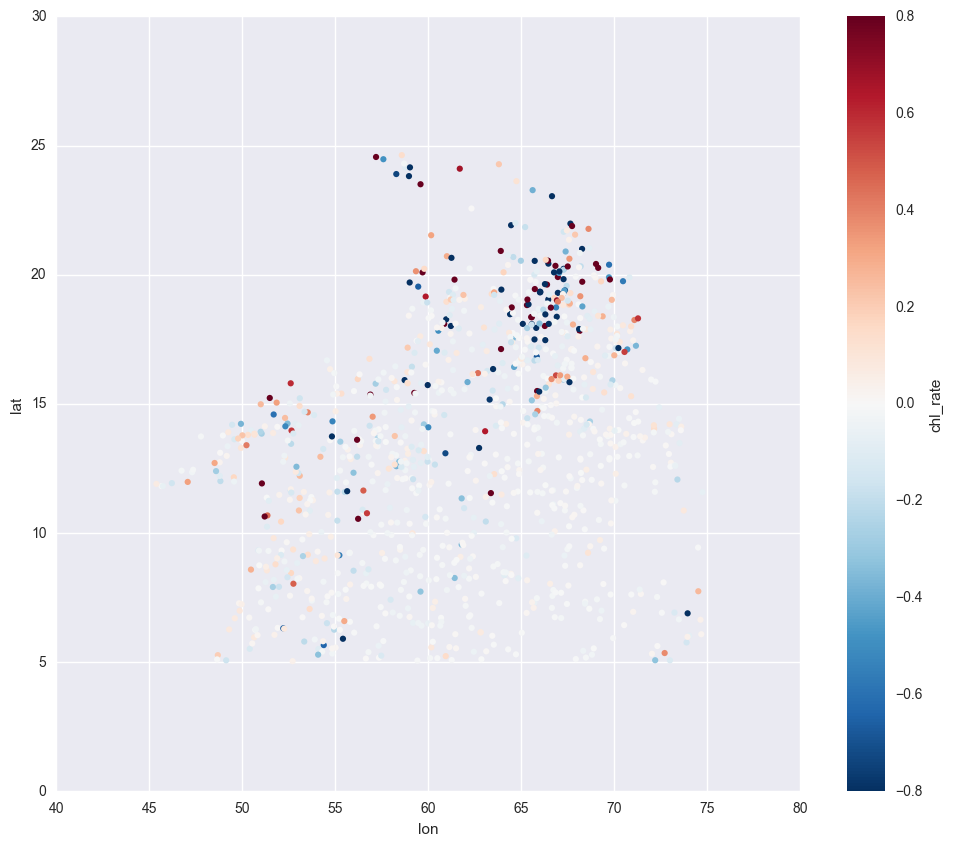

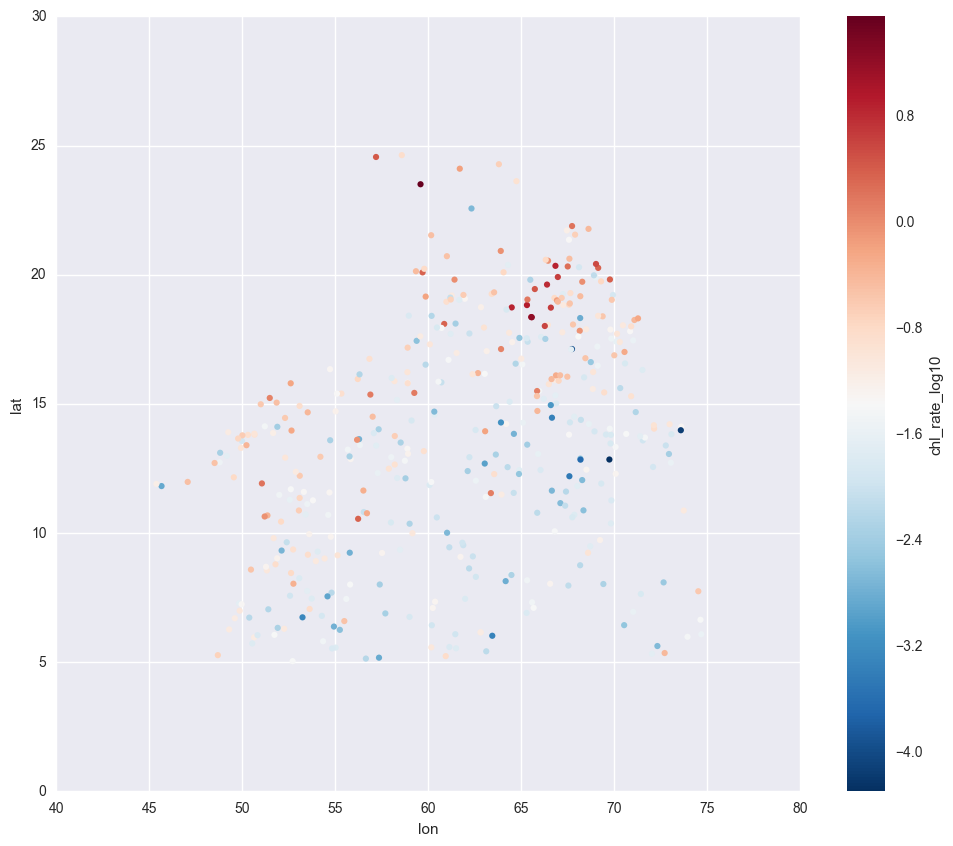

In [60]:
# prepare the data in dataset and about to take the diff
tmp = xr.Dataset.from_dataframe(floatsDFAll_8Dtimeorder.set_index(['time','id']) ) # set time & id as the index); use reset_index to revert this operation
# take the diff on the chl_ocx
chlor_a_rate = tmp.diff(dim='time',n=1).chlor_a.to_series().reset_index()
# make the column to a proper name
chlor_a_rate.rename(columns={'chlor_a':'chl_rate'}, inplace='True')
chlor_a_rate


# merge the two dataframes {floatsDFAll_2Dtimeorder; chl_ocx_rate} into one dataframe based on the index {id, time} and use the left method
floatsDFAllRate_8Dtimeorder=pd.merge(floatsDFAll_8Dtimeorder,chlor_a_rate, on=['time','id'], how = 'left')
floatsDFAllRate_8Dtimeorder

# check 
print('check the sum of the chl_ocx before the merge', chlor_a_rate.chl_rate.sum())
print('check the sum of the chl_ocx after the merge',floatsDFAllRate_8Dtimeorder.chl_rate.sum())


# visualize the chlorophyll rate, it is *better* to visualize at this scale
fig, ax  = plt.subplots(figsize=(12,10))
floatsDFAllRate_8Dtimeorder.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r',  vmin=-0.8, vmax=0.8, edgecolor='none', ax=ax)

# visualize the chlorophyll rate on the log scale
floatsDFAllRate_8Dtimeorder['chl_rate_log10'] = floatsDFAllRate_8Dtimeorder['chl_rate'].apply(scale)
floatsDFAllRate_8Dtimeorder
fig, ax  = plt.subplots(figsize=(12,10))
floatsDFAllRate_8Dtimeorder.plot(kind='scatter', x='lon', y='lat', c='chl_rate_log10', cmap='RdBu_r', edgecolor='none', ax=ax)
#floatsDFAllRate_8Dtimeorder.chl_rate.dropna().shape   #  (1050,) data points
floatsDFAllRate_8Dtimeorder.chl_rate_log10.dropna().shape   # (427,)  data points..... notice, chl_rate can be negative, so do not take log10

In [61]:
tmp # can check the dimension, (id: 299, time: 845)

<xarray.Dataset>
Dimensions:        (id: 259, time: 639)
Coordinates:
  * time           (time) datetime64[ns] 2002-07-04 2002-07-12 2002-07-20 ...
  * id             (id) int64 7574 10206 10208 11089 15703 15707 27069 27139 ...
Data variables:
    spd            (time, id) float64 nan 8.832 18.7 19.48 17.6 nan 25.74 ...
    vn             (time, id) float64 nan -0.2949 -9.82 -12.91 -8.593 nan ...
    var_lon        (time, id) float64 nan 0.005415 0.0001179 0.0001259 ...
    lon            (time, id) float64 nan 66.51 69.86 64.99 69.87 nan 69.35 ...
    lat            (time, id) float64 nan 16.21 13.62 16.14 13.65 nan 20.09 ...
    var_lat        (time, id) float64 nan 0.001424 6.2e-05 6.574e-05 ...
    ve             (time, id) float64 nan 7.335 13.25 12.26 12.13 nan 24.29 ...
    var_tmp        (time, id) float64 nan 1e+03 1e+03 0.00364 0.08777 nan ...
    temp           (time, id) float64 nan nan nan 27.81 28.57 nan 28.99 nan ...
    chlor_a        (time, id) float64 nan nan nan nan

In [62]:
mask2 = floatsDFAllRate_8Dtimeorder.lon.isnull() | floatsDFAllRate_8Dtimeorder.lat.isnull() | floatsDFAllRate_8Dtimeorder.time.isnull() | floatsDFAllRate_8Dtimeorder.chl_rate.isnull()
mask2
floatsDFAllRate_8Dtimeorder[~mask2].shape # the {long, lat, time} data has lots of values (1050, 15)

(1050, 15)

In [63]:
pd.to_datetime(floatsDFAllRate_8Dtimeorder.time)
type(pd.to_datetime(floatsDFAllRate_8Dtimeorder.time))
ts = pd.Series(0, index=pd.to_datetime(floatsDFAllRate_8Dtimeorder.time) ) # creat a target time series for masking purpose

# take the month out
month = ts.index.month 
# month.shape # a check on the shape of the month.
selector = ((11==month) | (12==month) | (1==month) | (2==month) | (3==month) )  
selector
print('shape of the selector', selector.shape)

print('all the data count in [11-01, 03-31]  is', floatsDFAllRate_8Dtimeorder[selector].chl_rate.dropna().shape) # total (683,)
print('all the data count is', floatsDFAllRate_8Dtimeorder.chl_rate.dropna().shape )   # total (1050,)

shape of the selector (165501,)
all the data count in [11-01, 03-31]  is (683,)
all the data count is (1050,)


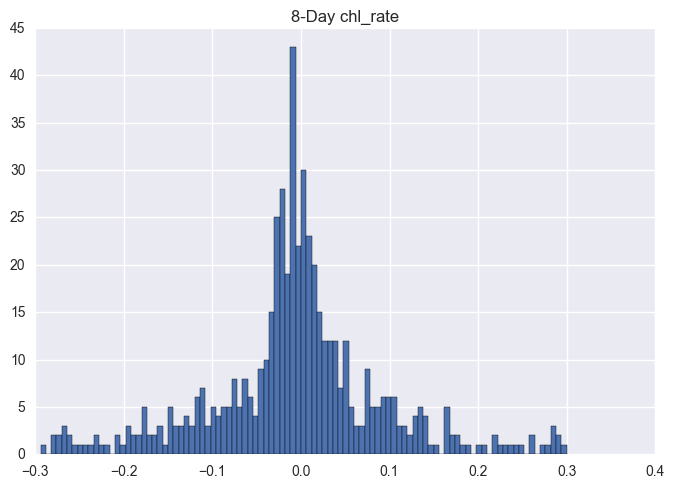

In [64]:
# histogram for non standarized data
axfloat = floatsDFAllRate_8Dtimeorder[selector].chl_rate.dropna().hist(bins=100,range=[-0.3,0.3])
axfloat.set_title('8-Day chl_rate')

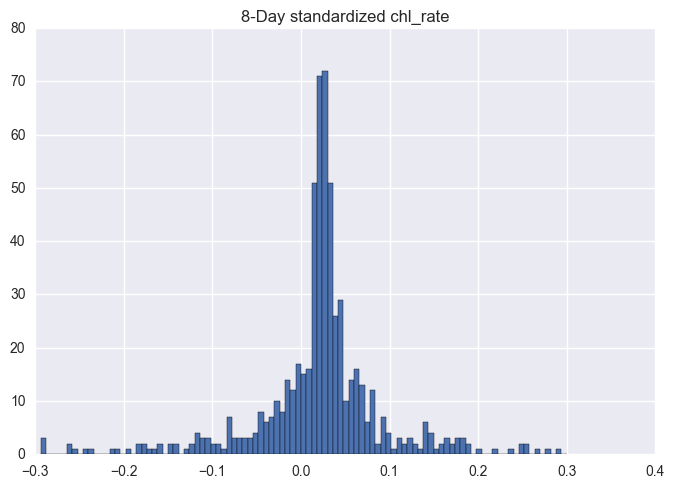

In [65]:
# standarized series
ts = floatsDFAllRate_8Dtimeorder[selector].chl_rate.dropna()
ts_standardized = (ts - ts.mean())/ts.std()
axts = ts_standardized.hist(bins=100,range=[-0.3,0.3])
axts.set_title('8-Day standardized chl_rate')

(45,)
(48,)
(6,)
(43,)
(98,)
(98,)
(139,)
(42,)
(64,)
(21,)
(37,)
(30,)
(213,)
(111,)
(55,)


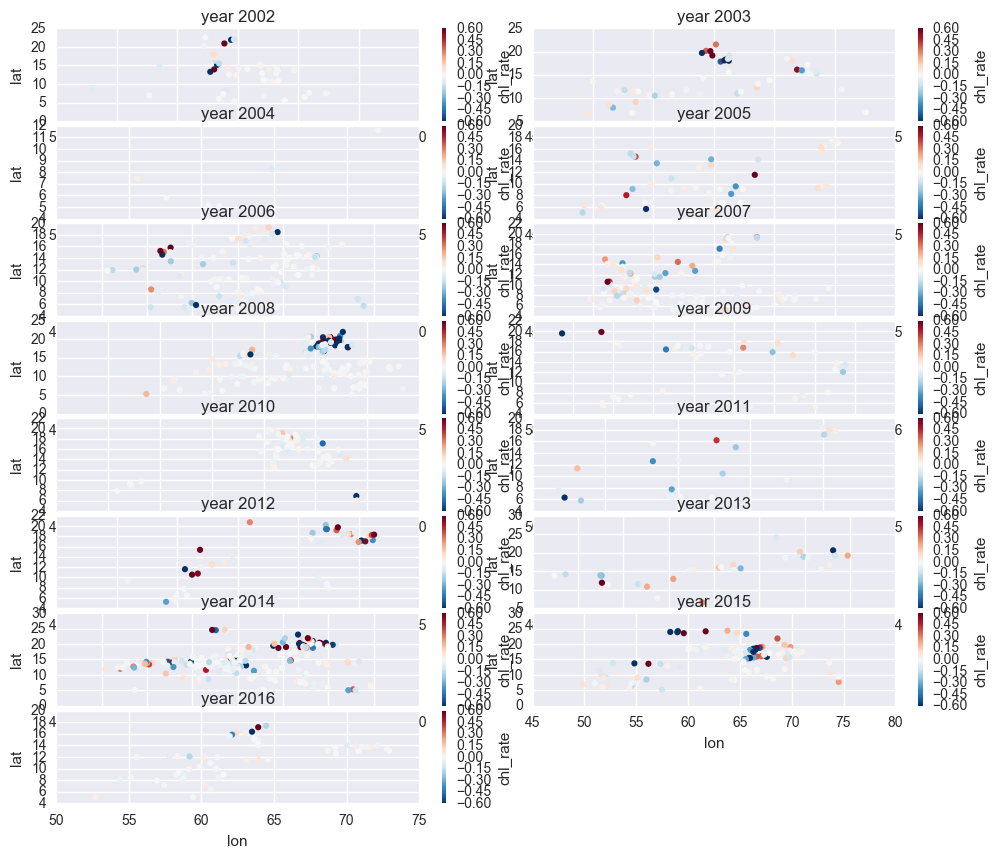

In [66]:
# all the data
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i, ax in zip(range(2002,2017), axes.flat) :
    tmpyear = floatsDFAllRate_8Dtimeorder[ (floatsDFAllRate_8Dtimeorder.time > str(i))  & (floatsDFAllRate_8Dtimeorder.time < str(i+1)) ] # if year i
    #fig, ax  = plt.subplots(figsize=(12,10))
    print(tmpyear.chl_rate.dropna().shape)   # total is 1050
    tmpyear.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r',vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax)
    ax.set_title('year %g' % i)     
    
# remove the extra figure
ax = plt.subplot(8,2,16)
fig.delaxes(ax)

(56,)
(0,)
(11,)
(73,)
(44,)
(108,)
(29,)
(51,)
(1,)
(38,)
(0,)
(120,)
(97,)
(55,)


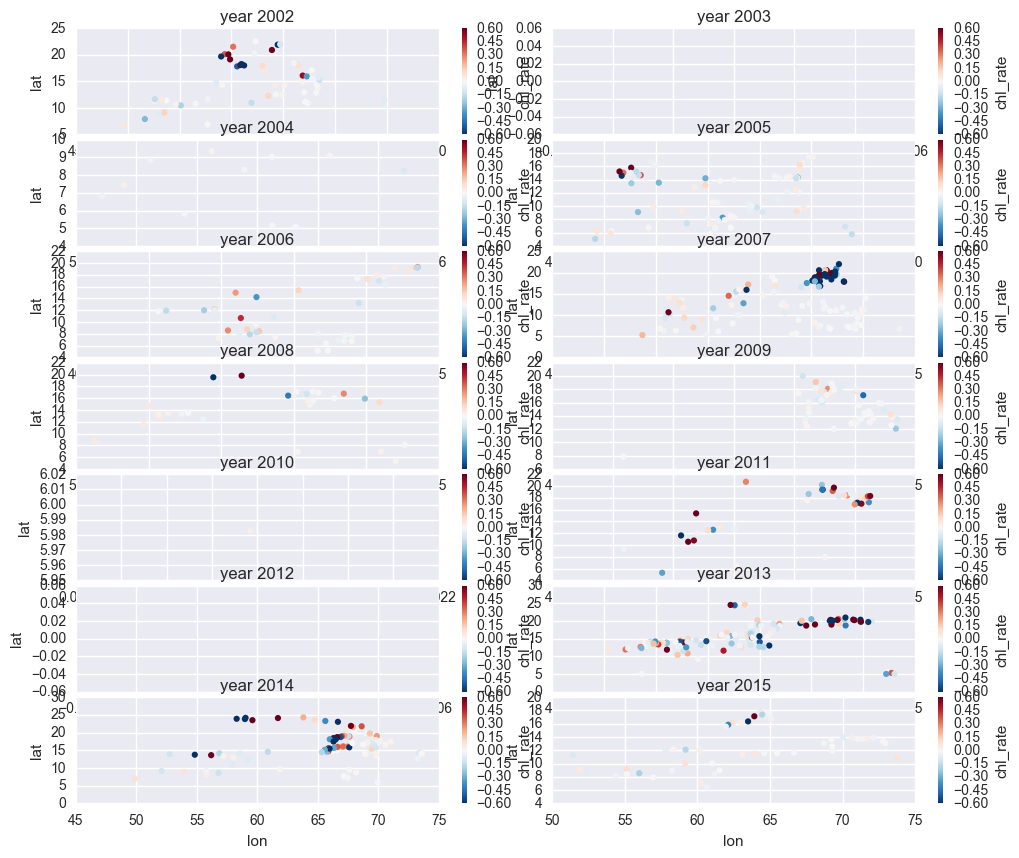

In [67]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i, ax in zip(range(2002,2016), axes.flat) :
    tmpyear = floatsDFAllRate_8Dtimeorder[ (floatsDFAllRate_8Dtimeorder.time >= (str(i)+ '-11-01') )  & (floatsDFAllRate_8Dtimeorder.time <= (str(i+1)+'-03-31') ) ] # if year i
    # select only particular month, Nov 1 to March 31
    #fig, ax  = plt.subplots(figsize=(12,10))
    print(tmpyear.chl_rate.dropna().shape)  # the total is 683
    tmpyear.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax)
    ax.set_title('year %g' % i)  

In [68]:
# let's output the data as a csv or hdf file to disk to save the experiment time

df_list = []
for i in range(2002,2017) :
    tmpyear = floatsDFAllRate_8Dtimeorder[ (floatsDFAllRate_8Dtimeorder.time >= (str(i)+ '-11-01') )  & (floatsDFAllRate_8Dtimeorder.time <= (str(i+1)+'-03-31') ) ] # if year i
    # select only particular month, Nov 1 to March 31
    df_list.append(tmpyear)
    
df_tmp = pd.concat(df_list)
print('all the data count in [11-01, 03-31]  is ', df_tmp.chl_rate.dropna().shape) # again, the total is  (683,)
df_chl_out_8D_modisa = df_tmp[~df_tmp.chl_rate.isnull()] # only keep the non-nan values
#list(df_chl_out_XD.groupby(['id']))   # can see the continuity pattern of the Lagarangian difference for each float id

# output to a csv or hdf file
df_chl_out_8D_modisa.head()

all the data count in [11-01, 03-31]  is  (683,)


,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664


In [69]:
df_chl_out_8D_modisa.index.name = 'index'  # make it specific for the index name

# CSV CSV CSV CSV with specfic index
df_chl_out_8D_modisa.to_csv('df_chl_out_8DOC_modisa.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_8DOC_modisa.csv', index_col='index')
test.head()

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10
index,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664
